### Comienza clase 10: 1/11/2025

In [46]:
# Traigo las librerias que necesito
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [47]:
# Ejemplo para ver como funciona una RANDOM VARIABLE:
# Hay una ruleta en un casino. La ruleta tiene 18 espacios rojos, 18 espacios negros, y 2 espacios verdes.
# al girar la ruleta, si sale rojo, el apostador gana $ 1 USD. Caso contrario (sale negro o verde), el apostador pierde $ 1 USD.
# Desde la vista del casino, si sale rojo el casino pierde $ 1 USD. Caso contrario (sale negro o verde), el casino gana $ 1 USD.
# Trabajaremos desde el punto de vista del CASINO.

ruleta = list(["Rojo"]*18 + ["Negro"]*18 + ["Verde"]*2) # Esto es lo mismo que listar Rojo 18 Veces, Negro 18 Veces, y Verde 2 veces.
print (ruleta)

['Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Verde', 'Verde']


In [48]:
# Debemos simular 1000 partidas, y luego calcular cuanto gano o perdio el casino. 

total = 0
results = [] # creamos una lista vacia
for i in range(1000): # hago 1000 intentos
    tirada = random.choice(ruleta) # el resultado puede cualquier elemento que este en la lista ruleta.
    results.append(tirada) #vamos agregando a la lista de resultados lo que salio en cada tirada
    if tirada == "Rojo":
        total = total + 1
    else:
        total = total - 1

if total > 0:
    x = "El Casino Gano"
else:
    x = "El Casino Perdio"

print(results)
print (x, total)

['Negro', 'Negro', 'Negro', 'Rojo', 'Rojo', 'Negro', 'Negro', 'Negro', 'Rojo', 'Negro', 'Negro', 'Negro', 'Rojo', 'Negro', 'Negro', 'Rojo', 'Negro', 'Negro', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Negro', 'Rojo', 'Negro', 'Rojo', 'Rojo', 'Rojo', 'Negro', 'Negro', 'Rojo', 'Rojo', 'Negro', 'Negro', 'Verde', 'Rojo', 'Rojo', 'Negro', 'Negro', 'Verde', 'Rojo', 'Rojo', 'Negro', 'Negro', 'Negro', 'Rojo', 'Negro', 'Negro', 'Rojo', 'Negro', 'Negro', 'Negro', 'Verde', 'Rojo', 'Verde', 'Rojo', 'Rojo', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Negro', 'Rojo', 'Negro', 'Verde', 'Negro', 'Negro', 'Rojo', 'Rojo', 'Negro', 'Rojo', 'Verde', 'Negro', 'Negro', 'Rojo', 'Negro', 'Rojo', 'Rojo', 'Negro', 'Negro', 'Negro', 'Rojo', 'Rojo', 'Negro', 'Negro', 'Negro', 'Negro', 'Rojo', 'Rojo', 'Rojo', 'Negro', 'Negro', 'Rojo', 'Rojo', 'Negro', 'Negro', 'Rojo', 'Negro', 'Rojo', 'Verde', 'Rojo', 'Rojo', 'Negro', 'Negro', 'Rojo', 'Negro', 'Rojo', 'Verde', 'Negro', 'Negro', 'Rojo', '

### Comienza clase 11: 1/13/2025

![alt text](image-1.png)




Probabilidad de la variable aleatoria X = P(X)
Como es aleatorio, (cada compañero obtendra un numero aleatorio, que puedo o no ser igual al mio)
Las Variables aleatorias las nombramos en mayuscula.

La pregunta del millon es, cual es el valor que deberia esperar que salga, por ejemplo teniendo en cuenta cual es el valor que sale con mayor frecuencia?

Para esto nos sirve hacer un modelo de muestreo, que repite muchisimas veces el evento "a", y se fija el valor que mas frecuencia tiene. De esta forma calculamos las frecuencias de cada valor.
Cuando hay algo que se repite muchas veces hacemos una funcion.eso es lo que crearemos para generar este modelo de muestreo.

In [49]:
# Hacemos una funcion con dos argumentos

def roullete_spin(spins=1000, roullete=ruleta):
    earnings = 0
    for _ in range(spins): # Esta sentencia quiere decir "Ejecute algo 1000 veces". El underline "_" sirve como place holder. Esta diciendo que va a tomar algo de la ruleta.
        result = random.choice(roullete)
        if result == "Rojo": 
            earnings -= 1
        else:
            earnings += 1
    return earnings

In [50]:
roullete_spin()

48

In [51]:
# SAMPLING MODEL (Vamos a crear nuestro modelo de muestreo)
samplings = []
for _ in range (10000):
    samplings.append(roullete_spin()) # lista donde se almacenan los resultados



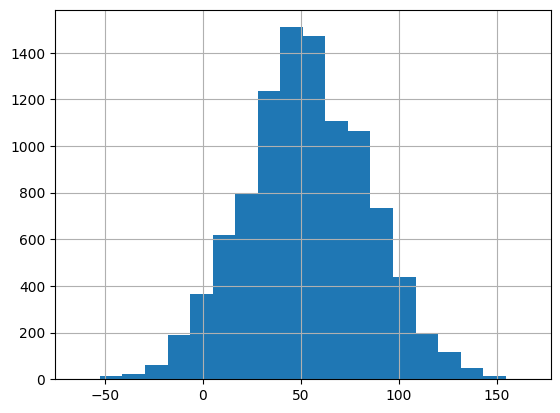

In [52]:
# Plot Frecuencies Histograms
plt.hist(samplings, bins=20)
plt.grid(True)
plt.show()

In [53]:
# Si incrementamos el range, vamos a darnos cuenta que el histograma no cambia demasiado.
# Al probar con 1000000, demoro mucho. Asi que paramos el proceso con el stop cuadrado de la izquierda. Y probamos con 100.000
# Vemos que la ganancia esperada sigue siendo 50

#### Vamos a la pizarra a ver VALOR ESPERADO


![alt text](image-3.png)

Hay solo dos resultados posibles en este juego. 
La casa Gana (Win), sacando negro o verde,  o 
la casa Pierde (Lose), sacando rojo

Entonces se cumple que P(W)+P(L) = 1 (*)

Probabilidad de Sacar Negro = 18/38
Probabilidad de Sacar Verde = 2/38
Probabilidad de Ganar = P(W) = 20/38 = 10/19

Probabilidad de Perder = P(L), 
    Lo calculamos usando esta propiedad(*)
        P(L) = 1 - P(W) = 1 - 10/19 = 9/19

    otra forma de calcularlo, es por el complemento. Es decir, calculando la probabilidad de Perder, (sacar rojo):
        P(L) = 18/38 = 9/19

La esperanza de mi variable aleatoria X, que representa a mi total de ganancia despues de 1000 tiradas, 

E[X] = 1000 * (10/19 - 9/19) = 1000 * 1/19 = 1000 * 0.0526 = 52.6

Entonces, la esperanza de ganar luego de 1000 tiradas es de 52.6

En el ejemplo de los tigres y las aguilas. E(x) Se lee como la esperanza de que en ese evento (es decir, en ese partido) ganen los tigres y los aguilas respectivamente. 
Y como tengo $1000, deberia apostar 1000 * E(X)


#### Vamos a la pizarra a ver los CLT = TEOREMA DEL LIMITE CENTRAL
![alt text](image-4.png)

CLT tell us that when the bnumber of draws (repeats) is large, the probability of sum of independet draws is approximately nomral.

Esto nos dice que, si el numero de repeticiones es grande, la probabilidad de la suma de las extraccciones independientes, es aproximadamente normal.

Escuchar esta parte, porque no entendi bien la explicacion, pero decia basicamente cuando funciona y cuando no el CLT.


#### Vamos a la pizarra a ver el STANDARD ERROR.

Escuchar esta parte, porque no entendi bien la explicacion.
Basicamente decia que el error standard, nos da la medida de dispercion de una distribucion particular, (Que no entendi cual era)

![](image-5.png)
![alt text](image-6.png)


In [54]:
# Standard error
std = np.std(samplings)
std

np.float64(31.397635089923572)

In [55]:
n = len(samplings)
n


10000

In [56]:
# Standard error formula
std/np.sqrt(n) #sqrt = raiz cuadrada

np.float64(0.3139763508992357)